# Pymaceuticals Inc.

### Analysis
Of the 10 drugs that were tested Ramicane & Capomulin comparatively stood out as more effective in a significant manner as shown in the metrics of mean", "median", "var", "std", "and sem.
Gender has shown negligible discrepancies in the trials as seen in the charts; 49.6% Female vs. 50.4% Male mice.
The only drug regimen that resulted in any outliers (a single instance below the lower bound) was with Infubinol.
 Noticeably, a strong positive correlation exists between the mouse size(weight) and the average tumor volume ( R-squared= 0.84).

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [3]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mic = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mic

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_mic= merged_data[merged_data["Mouse ID"].isin(duplicate_mice) == False]
clean_duplicate_mic

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_duplicate_mic["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
Summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_table_2 = clean_duplicate_mic.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
Summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

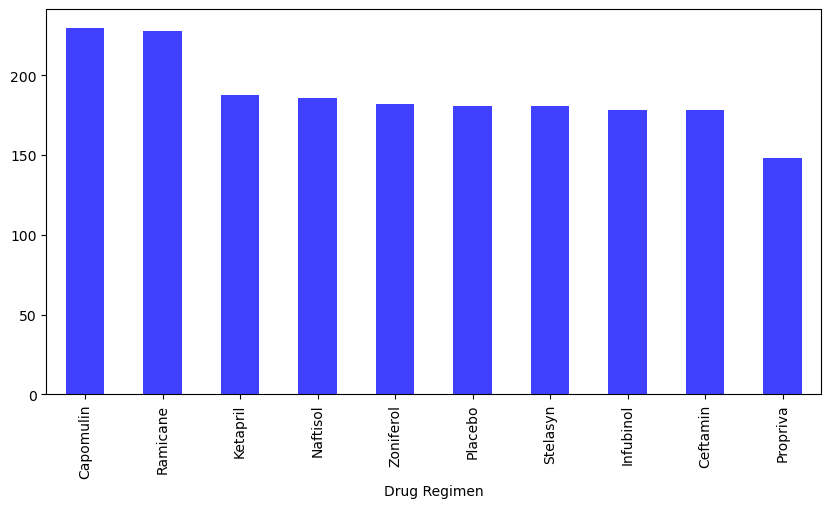

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Bar_Chart = clean_duplicate_mic["Drug Regimen"].value_counts().plot(kind="bar", color="blue", alpha=0.75, figsize=(10, 5))
Bar_Chart

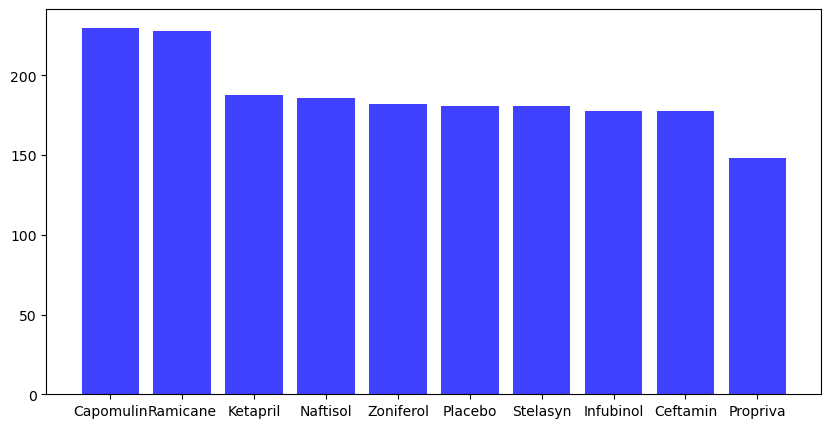

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Bar_Chart_2 = clean_duplicate_mic["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(Bar_Chart_2.index, Bar_Chart_2.values, color="blue", alpha=0.75)
plt.show()

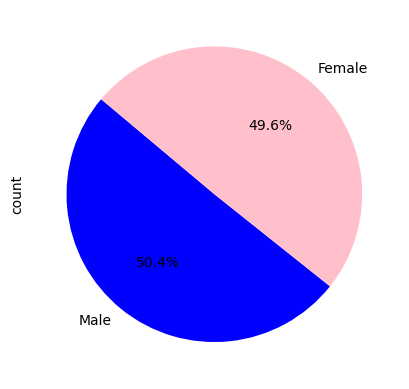

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pie_chart = clean_duplicate_mic.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
counts = pie_chart["Sex"].value_counts()
# Get the unique mice with their gender
counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["blue", "pink"])
plt.show()

# Make the pie chart


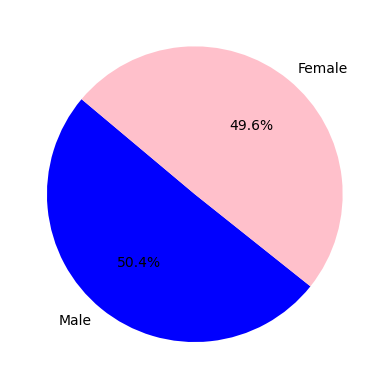

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
pie_chart = clean_duplicate_mic.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
counts = pie_chart["Sex"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140, colors=["blue", "pink"])
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_duplicate_mic.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_timepoint.merge(clean_duplicate_mic, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/hz/0rnkhv9s4tj7tfnl6zvwxkf40000gn/T/ipykernel_29640/2035973270.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(marker="o", markerfacecolor="r", markersize=12))


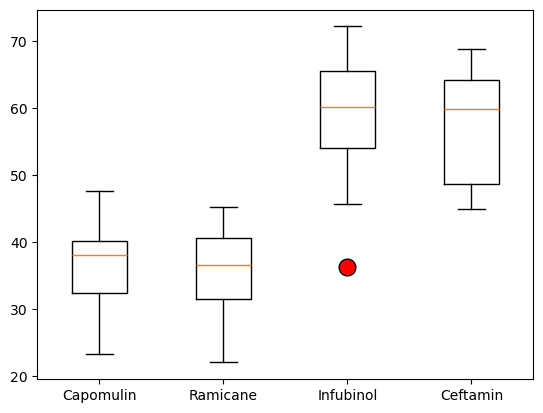

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(marker="o", markerfacecolor="r", markersize=12))
plt.show()

## Line and Scatter Plots

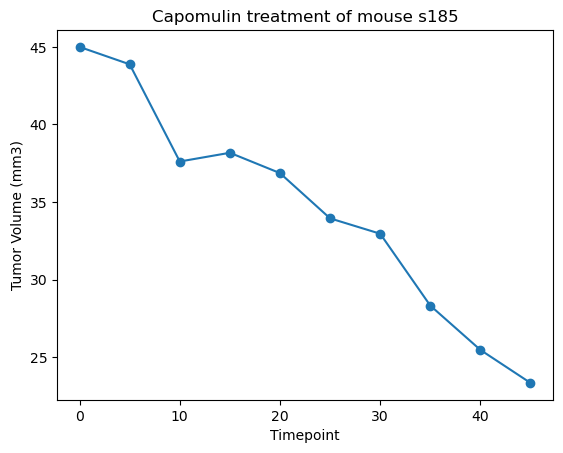

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_duplicate_mic.loc[clean_duplicate_mic["Drug Regimen"] == "Capomulin"]
mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()

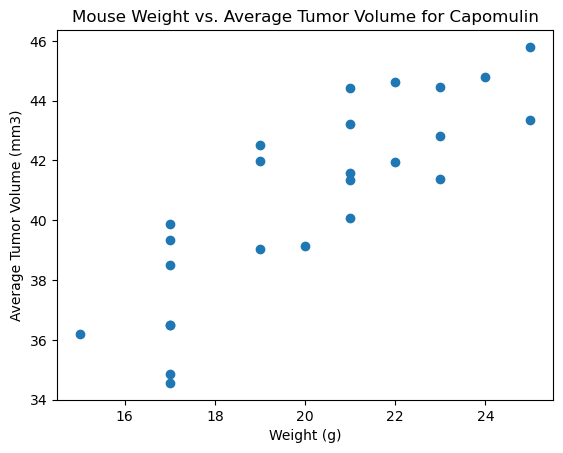

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_duplicate_mic.loc[clean_duplicate_mic["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin_data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


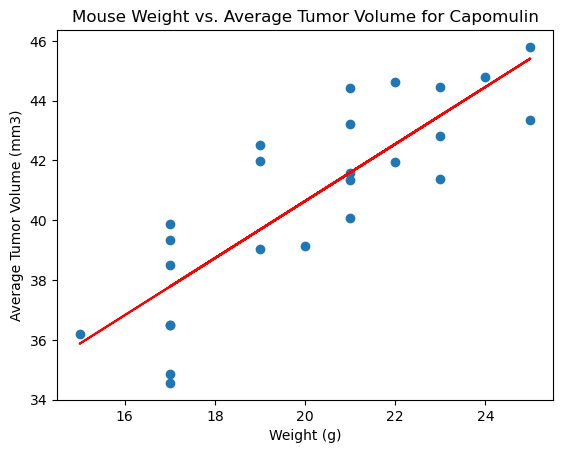

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
model = st.linregress(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
y_values = avg_tumor_vol["Weight (g)"] * model[0] + model[1]
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
plt.plot(avg_tumor_vol["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.show()